**Black-Scholes Model**

Accuracy for Predicting Call Prices: 62.04%
Accuracy for Predicting Put Prices: 76.18%


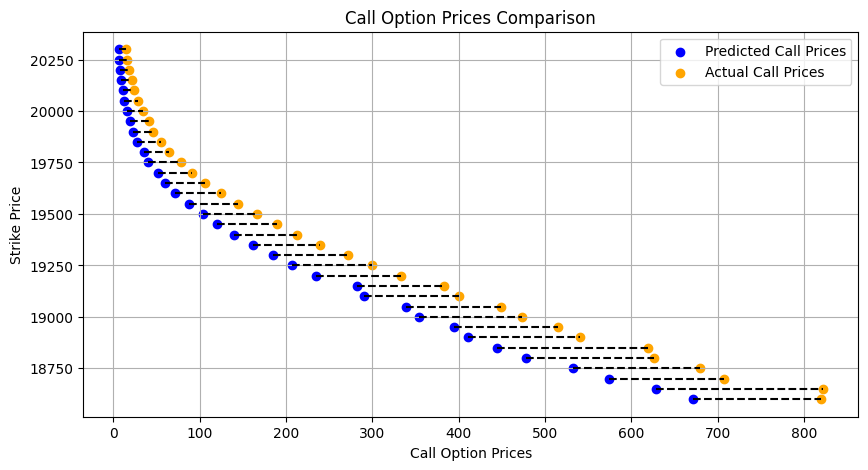

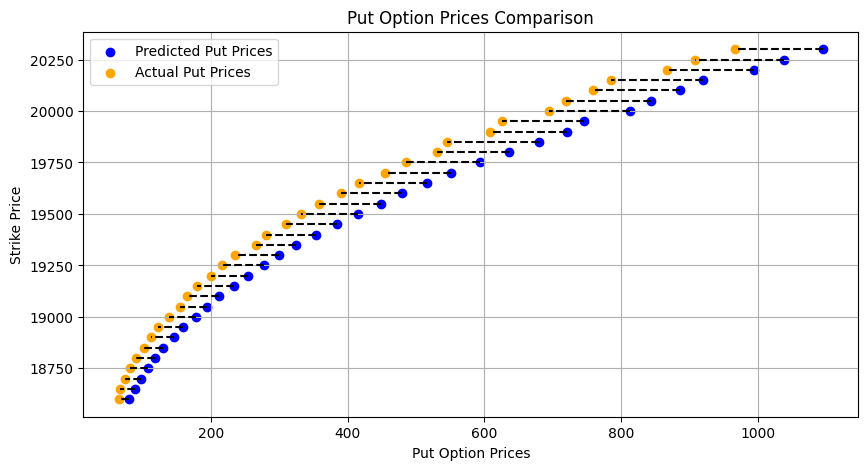

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Load data from CSV
data_path = "/content/drive/MyDrive/Finsearch /findata.csv"
stored_data = pd.read_csv(data_path)

# Column names mapping
columns = {
    "spot_price": "spot price",
    "strike_price": "strike Prce",
    "call_option_price": "call Option prices",
    "put_option_price": "put Opion prices",
    "call_volatility": "call volatility",
    "put_volatility": "put volatility",
    "time_period": "time period",
    "risk_free_return": "risk free return %"
}

# Extract data into arrays
data = {col: stored_data[columns[col]].values for col in columns}

# Black-Scholes function using vectorization
def black_scholes_price(s, k, r, t, v, option_type='call'):
    d1 = (np.log(s / k) + (r + 0.5 * v**2) * t) / (v * np.sqrt(t))
    d2 = d1 - v * np.sqrt(t)

    if option_type == 'call':
        return s * norm.cdf(d1) - k * np.exp(-r * t) * norm.cdf(d2)
    elif option_type == 'put':
        return k * np.exp(-r * t) * norm.cdf(-d2) - s * norm.cdf(-d1)
    else:
        raise ValueError("option_type must be either 'call' or 'put'")

# Predict values using vectorized operations
predicted_call_values = black_scholes_price(
    data['spot_price'], data['strike_price'],
    data['risk_free_return'] / 100, data['time_period'],
    data['call_volatility'] / 100, option_type='call'
)

predicted_put_values = black_scholes_price(
    data['spot_price'], data['strike_price'],
    data['risk_free_return'] / 100, data['time_period'],
    data['put_volatility'] / 100, option_type='put'
)

# Accuracy calculation using vectorized approach
def calculate_accuracy(predicted, actual):
    percent_errors = np.abs((predicted - actual) / actual) * 100
    return 100 - np.mean(percent_errors)

call_accuracy = calculate_accuracy(predicted_call_values, data['call_option_price'])
put_accuracy = calculate_accuracy(predicted_put_values, data['put_option_price'])

print(f"Accuracy for Predicting Call Prices: {call_accuracy:.2f}%")
print(f"Accuracy for Predicting Put Prices: {put_accuracy:.2f}%")

# Enhanced Plotting with additional insights
def plot_option_prices(predicted_values, actual_values, strike_prices, option_type):
    plt.figure(figsize=(10, 5))

    # Scatter plot to show individual predictions vs. actual values
    plt.scatter(predicted_values, strike_prices, color='blue', label=f'Predicted {option_type.capitalize()} Prices')
    plt.scatter(actual_values, strike_prices, color='orange', label=f'Actual {option_type.capitalize()} Prices')

    # Line plot to connect the actual and predicted values for better visualization
    for i in range(len(strike_prices)):
        plt.plot([predicted_values[i], actual_values[i]], [strike_prices[i], strike_prices[i]], 'k--')

    plt.title(f'{option_type.capitalize()} Option Prices Comparison')
    plt.xlabel(f'{option_type.capitalize()} Option Prices')
    plt.ylabel('Strike Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot Call option prices
plot_option_prices(predicted_call_values, data['call_option_price'], data['strike_price'], 'call')

# Plot Put option prices
plot_option_prices(predicted_put_values, data['put_option_price'], data['strike_price'], 'put')


**Monte Carlo Simulations**

Estimated European Call Option Price: 17.80


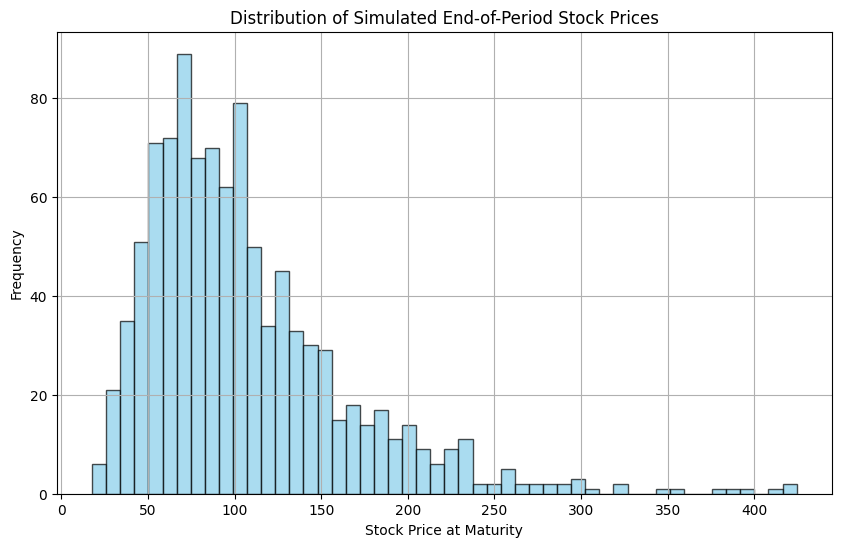

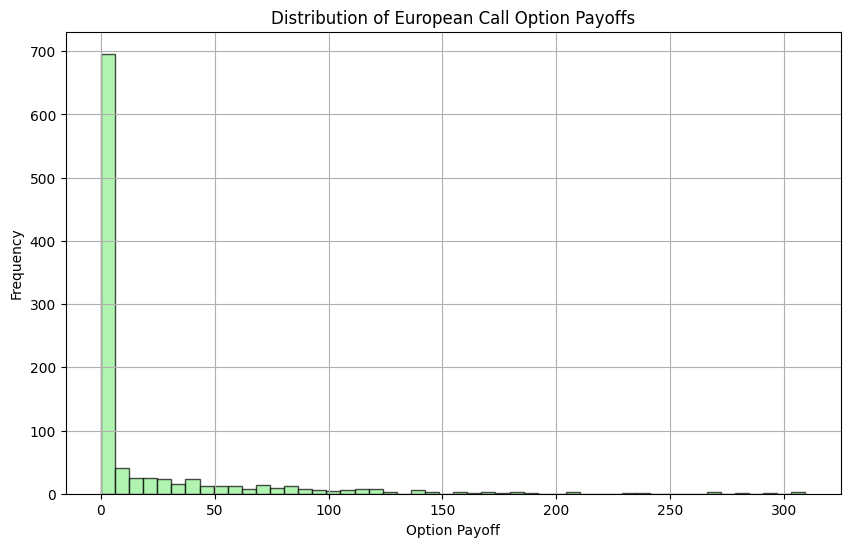

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Monte Carlo simulation to estimate the price of a European call option
def monte_carlo_option_pricing(S0, K, T, r, sigma, simulations=10000):
    # Generate random variables from a standard normal distribution
    Z = np.random.standard_normal(simulations)

    # Simulate end-of-period stock price
    ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)

    # Calculate the payoff for each simulation
    payoff = np.maximum(ST - K, 0)

    # Discount the payoff back to present value and calculate the average
    option_price = np.exp(-r * T) * np.mean(payoff)

    # Return both the option price and simulated end-of-period prices
    return option_price, ST, payoff

# Parameters
S0 = 100   # Initial stock price
K = 115    # Strike price
T = 1      # Time to maturity (1 year)
r = 0.05   # Risk-free rate
sigma = 0.5  # Volatility
simulations = 1000  # Number of Monte Carlo simulations

# Estimate the option price using Monte Carlo simulation
estimated_price, simulated_prices, simulated_payoffs = monte_carlo_option_pricing(S0, K, T, r, sigma, simulations)

# Print the estimated option price
print(f"Estimated European Call Option Price: {estimated_price:.2f}")

# Plot the distribution of simulated end-of-period stock prices
plt.figure(figsize=(10, 6))
plt.hist(simulated_prices, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Distribution of Simulated End-of-Period Stock Prices")
plt.xlabel("Stock Price at Maturity")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Plot the distribution of option payoffs
plt.figure(figsize=(10, 6))
plt.hist(simulated_payoffs, bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title("Distribution of European Call Option Payoffs")
plt.xlabel("Option Payoff")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
